# Question 01
Build a machine learning model to predict salary based on position for
a given dataset \
[https://drive.google.com/open?id=1jKfNxQkybZKprVpCkoL16mTjmSSnCol3]

In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn import preprocessing, svm
from sklearn.preprocessing import *
from sklearn.preprocessing import normalize as N
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
%matplotlib inline

In [4]:
# Reading in the data
try:
    df = pd.read_csv("Position_Salaries.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Processing and Analysis

In [5]:
df.head(11)   # Printing the first 11 rows of data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
df.tail()   # Printing the last 5 rows of data

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
df.shape        # Printing the shape of data

(10, 3)

In [8]:
df.nunique().T      # Printing the count of unique values of data

Position    10
Level       10
Salary      10
dtype: int64

In [9]:
df.describe()       # Generating statistical summary of the data

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


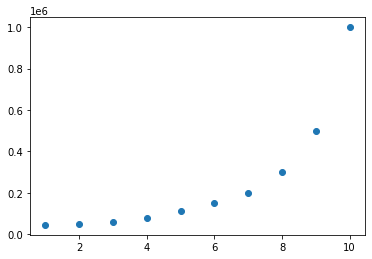

In [10]:
# visual representation of the data to find any observable relationships between provided attributes
plt.scatter(df['Level'], df['Salary'])
plt.show()

In [11]:
df['Salary'].values

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Text(0.5, 0, 'Level')

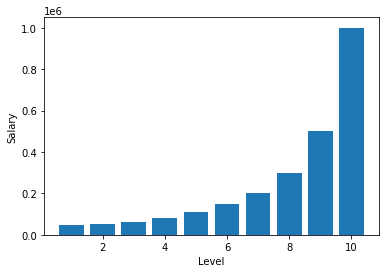

In [10]:
# visual representation of the data to find any observable relationships between provided attributes
plt.bar(df['Level'], df['Salary'])
plt.ylabel('Salary')
plt.xlabel('Level')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

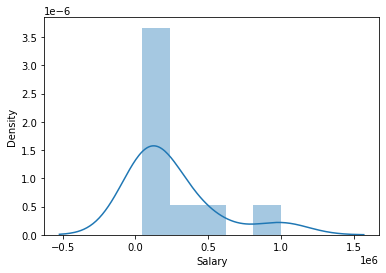

In [12]:
sn.distplot(df['Salary'])

In [13]:
df.dtypes       # Checking the data types of the columns

Position    object
Level        int64
Salary       int64
dtype: object

In [14]:
df.isnull().any()   # Checking the data for null values

Position    False
Level       False
Salary      False
dtype: bool

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

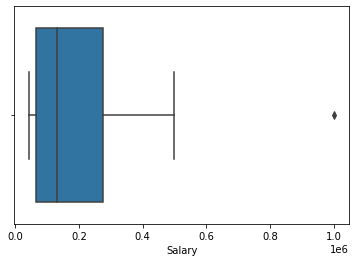

In [15]:
# Boxplot to find the outliers in the columns
sn.boxplot(df['Salary'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Level'>

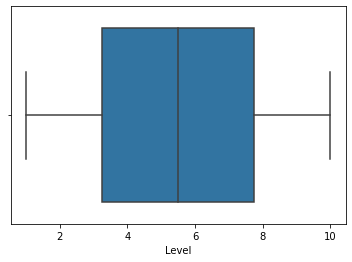

In [16]:
# Boxplot to find the outliers in the columns
sn.boxplot(df['Level'])

In [17]:
df = df.drop('Position', axis=1)

In [18]:
df.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [19]:
# Function to remove the outliers from the whole dataset
def remove_outlier(data):
    quant_df = data.quantile([0.30, 0.70])
    for name in list(data.columns): data = data[(data[name] > quant_df.loc[0.30, name]) & (data[name] < quant_df.loc[0.70, name])]
    return data

> Visualizing the data to check for skewness and reduce it

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Level', ylabel='Density'>

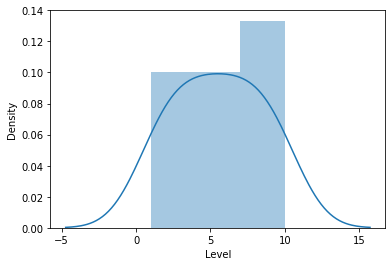

In [20]:
sn.distplot(df['Level'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

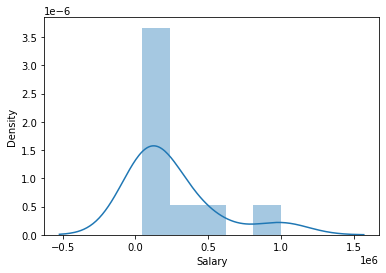

In [21]:
sn.distplot(df['Salary'])

In [22]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [23]:
df.skew()

Level     0.000000
Salary    2.104605
dtype: float64

Skewness is 1.1572631557695297
Mean is 56.048744764427354 , Median is  50.5235635148792


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

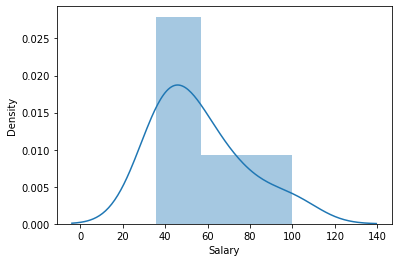

In [24]:
target = (np.cbrt((df['Salary'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median())
sn.distplot(target)
# df['YearsExperience'] = target

### Train/Test Split

In [25]:
X = np.array(df['Level']).reshape(-1, 1)
y = np.array(df['Salary']).reshape(-1, 1)

In [26]:
X = X[:9,:]
y = y[:9,:]

In [27]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

### Data Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [29]:
try:
    S_x = StandardScaler().fit(X_train)
    S_y = StandardScaler().fit(y_train)
    X_train = S_x.transform(X_train).reshape(-1,1)
    y_train= S_y.transform(y_train)
    y_train= np.array(y_train)
    
except Exception as e:
    print(f"Error : {e}")

In [30]:
try:
    S_x_1 = StandardScaler().fit(X_test)
    S_y_1 = StandardScaler().fit(y_test)
    X_test = S_x_1.transform(X_test).reshape(-1,1)
    y_test= S_y_1.transform(y_test)
except Exception as e:
    print(f"Error : {e}")

### Model Training and Testing

In [32]:
try:
    linear_R = LinearRegression()   # creating Linear regression object
    poly_reg = PolynomialFeatures() # creating polynomial Feature regression object
    train_poly = poly_reg.fit_transform(X_train.reshape(-1,1))
    linear_R.fit(train_poly,y_train)        # fitting linear regression model
    Yhat = linear_R.predict(poly_reg.fit_transform(X_test.reshape(-1,1)))        # predicting the values on basis of our input data
    accuracy = r2_score(Yhat,y_test)*100
except Exception as e:
    print(f"Error : {e}")

In [33]:
print("The accuracy of the model is", accuracy)

96.96470567597942


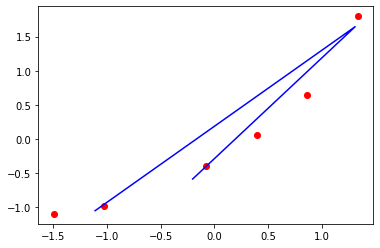

In [35]:
try:
    plt.scatter(X_train, y_train, color ='red')
    plt.plot(X_test, Yhat, color ='blue')
    plt.show()
except Exception as e:
    print(f"Error : {e}")

### Evaluation Metrics

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=Yhat)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=Yhat) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=Yhat,squared=False)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.17691457243834185
MSE: 0.04221023950379189
RMSE: 0.2054513068923921


In [34]:
Accuracy = (1-mse)*100

In [35]:
print('Accuracy : ',Accuracy)

Accuracy :  96.97441694139573
